# Final Project Phase 3

### Alicia Chen (ac2596), Stephanie Chow (sac342), Michelle Wang (mqw4)

## Introduction

Using datasets that catalogue information regarding K-pop songs, idols, and music videos, we want to identify major trends pertaining to the K-pop phenomenon. Three main research questions we are trying to answer are:  <br />
1. Are there any trends between songs sung by boy groups, girl groups, and coed groups in terms of their popularity?
2. How can we compare the success between soloists versus groups in the K-pop scene?
3. What kinds of relationships exist between total likes on a music video (MV) versus their total views?
4. Is there a link between how old an MV is versus their total view count?  <br />

Main findings:

1. As MV views increase, the likes count also tends to increase.
2. It seems that male groups are currently the most popular, although girl groups tend to have the largest variety in the number of views their music videos gather. Coed groups overall do the worst.
3. K-pop groups do the best in comparison to soloists, however it seems that there are some outlier videos from soloists that do very well.
4. There is practically no correlation between how old an MV is and their individual view count.


## Data Description

We decided to data-scrape two online datasets created by a site called aoimirai.net. The first dataset (Dataset 1) we scraped lists individual MVs and their views, likes, groups, like ratio etc. The second dataset (Dataset 2) we scraped lists each group, and their album sales, total views, and the type of artist it is. We used these two datasets to create one big dataset, where the observations are the individual MVs, and the attributes are:
1. The song title
2. The song artist
3. What type of artist they are (This includes male group, female group, coed group, male soloist, and female soloist)
4. The number of likes for the observed MV has
5. The like ratio for the observed MV (so the number of likes over the total number of reactions -- likes and dislikes -- the MV gathered)
6. The number of views the video has
7. How old in days the video is
8. How old in years the video is
9. The average number of likes per MV for the observed artist
10. The total number of album sales for the observed artist
11. The total number of views the observed artist has for all their MVs
 
Due to the large number of MVs released by K-pop artists, we only included the top 1000 MVs based on the number of likes, as of April 2020. The original dataset was created as a way for the owner to showcase the trends of different idols and videos as they are released, and to allow users to explore how well the MVs of their favorite K-pop artists were doing. <br />

We created our corresponding dataset as a way to figure out if there are any trends among groups that tend to be popular, or if there are any unexpected values, such as artists who may have a large overall view count, but a low view count per video. These videos and counts are taken from Youtube, so the counts from other large media distribution sites are not included. This may influence the data because Youtube is the main platform used for "International Fans" (those who reside outside of South Korea) whereas Naver is the primary video distribution method in South Korea. Also, the popularity of a group may not be based on views and likes count of a Youtube video, as there may be some songs or artists who rank differently in other sites, such as iTunes and Spotify. <br />

The raw source data can be found in the aoimirai site, including: 
(300 data entries): http://kpop.aoimirai.net/artists.html?options=1111&cols=101100011&hideone=1&ord=3D&limit=1 
<br />
(1000 data entries):
http://kpop.aoimirai.net/mvs.html?options=11110&cols=111110000&ord=4D&limit=2
<br />

In the original datasets, we had to remove a lot of excess text decorations to ensure that the data was easy to read. For example, when we filtered the artist column for both datasets, we had to remove the associated indexing that was attached to the artist names presented. In addition, in order to be able to merge the two datasets, we had to disregard the korean that was found in the second dataset. We also had to parse information from an invisible column within the datasets in order to get the type of artist for the observed artist, since the original website used figures to symbolize the type of artist. To solve the above problems, we used splicing and regular expressions in addition to the Beautiful Soup library. Both datasets 1 and 2 also used the alternative method of decimals and commas as indicators such that decimals were used to indicate thousands and commas were used to indicate decimals. Thus, we switched the two to stay in line with American standardization.
<br />

The dataset we have created can be found in our Github Repository (found in the Source Code section below)
<br />
The web scraping done for the original datasets can be found in our Github Repository




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import re
from scipy.stats import t

### Data Cleaning and Import

In [2]:
# function to change periods to commas
def period_to_comma(old_array):
    new_array = []
    [new_array.append(i.replace(".", ",")) for i in old_array]
    return new_array

# function to change comma to periods
def comma_to_period(old_array):
    new_array = []
    [new_array.append(i.replace(",", ".")) for i in old_array]
    return new_array

# function to remove all commas
def no_comma(data):
    return re.sub(",", "", data)

In [3]:
combined_data = pd.read_csv("combined.csv", encoding='utf-8')
combined_data.head()

,Unnamed: 0,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
0,0,Gangnam Style,PSY,male soloist,"17,848,966",88.2%,"3,612,465,662",2.859 days,7.832877,"1,997,592","518,974","6,054,464,700"
1,1,Gentleman,PSY,male soloist,"6,007,998",87.3%,"1,312,037,506",2.587 days,7.087671,"1,997,592","518,974","6,054,464,700"
2,2,Daddy,PSY,male soloist,"3,799,519",93.8%,"493,121,830",1.626 days,4.454795,"1,997,592","518,974","6,054,464,700"
3,3,New Face,PSY,male soloist,"1,581,019",95.0%,"205,665,596",1.099 days,3.010959,"1,997,592","518,974","6,054,464,700"
4,4,I Luv it,PSY,male soloist,"973,795",94.7%,"101,822,612",1.099 days,3.010959,"1,997,592","518,974","6,054,464,700"


In [4]:
replace_likes = []
likes_column = combined_data['Likes']
for like in likes_column:
    replace_likes.append(no_comma(like))
    
replace_views = []
views_column = combined_data['MV Views']
for view in views_column:
    replace_views.append(no_comma(view))
    
replace_likes = np.array(replace_likes, dtype="int64")
replace_views = np.array(replace_views, dtype="int64")
combined_data['Likes'] = replace_likes
combined_data['MV Views'] = replace_views
sorted_byLikes = combined_data.sort_values("Likes", axis=0, ascending=False)
sorted_byLikes.head()

,Unnamed: 0,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
0,0,Gangnam Style,PSY,male soloist,17848966,88.2%,3612465662,2.859 days,7.832877,"1,997,592","518,974","6,054,464,700"
7,7,Boy with luv,BTS,male group,14942987,94.3%,776602125,397 days,1.087671,"2,400,603","21,047,066","11,914,564,663"
8,8,DNA,BTS,male group,13257145,94.9%,978195463,968 days,2.652055,"2,400,603","21,047,066","11,914,564,663"
103,103,Kill this Love,Blackpink,female group,12920236,93.9%,826027265,405 days,1.109589,"3,495,869","652,585","6,236,964,281"
104,104,Ddu-du Ddu-du,Blackpink,female group,12544634,94.5%,1144730047,698 days,1.912329,"3,495,869","652,585","6,236,964,281"


In [5]:
sorted_byViews = combined_data.sort_values("MV Views", axis=0, ascending=False)
sorted_byViews.head()

,Unnamed: 0,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
0,0,Gangnam Style,PSY,male soloist,17848966,88.2%,3612465662,2.859 days,7.832877,"1,997,592","518,974","6,054,464,700"
1,1,Gentleman,PSY,male soloist,6007998,87.3%,1312037506,2.587 days,7.087671,"1,997,592","518,974","6,054,464,700"
104,104,Ddu-du Ddu-du,Blackpink,female group,12544634,94.5%,1144730047,698 days,1.912329,"3,495,869","652,585","6,236,964,281"
8,8,DNA,BTS,male group,13257145,94.9%,978195463,968 days,2.652055,"2,400,603","21,047,066","11,914,564,663"
105,105,Boombayah,Blackpink,female group,7561192,95.3%,849999809,1.374 days,3.764384,"3,495,869","652,585","6,236,964,281"


In [6]:
sorted_byRatio = combined_data.sort_values("Likes Ratio", ascending=False)
sorted_byRatio.head()

,Unnamed: 0,Song Title,Artist,Type of Artist,Likes,Likes Ratio,MV Views,Days Old,Years Old,Likes/MV,Sales,Total Views
456,456,Miroh(dance),StrayKids,male group,389016,99.8%,5001411,402 days,1.101370,"479,271","1,026,466","654,638,916"
476,476,Boom(alternate),NCTDREAM,male group,303676,99.8%,2949506,278 days,0.761644,"433,529","1,048,154","353,880,465"
433,433,Coming Home,NCTU,male group,358959,99.8%,3907620,152 days,0.416438,"672,391",0,"376,266,781"
454,454,N/S,StrayKids,male group,428638,99.8%,7447947,539 days,1.476712,"479,271","1,026,466","654,638,916"
455,455,TMT,StrayKids,male group,405295,99.8%,5523195,317 days,0.868493,"479,271","1,026,466","654,638,916"


## Data Analysis
Overall, the mean and standard deviations of the different categories can’t tell us much by themselves, but it is a good way to compare within different categories. Here are the statistics we have gathered, as seen below:


### Music Video Views vs. Likes

Music Video Views vs. Likes:


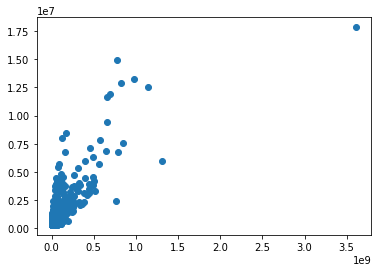

In [7]:
sorted_byViews_ascending = combined_data.sort_values("MV Views", axis=0, ascending=True)

print('Music Video Views vs. Likes:')
plt.scatter(sorted_byViews_ascending['MV Views'], sorted_byViews_ascending['Likes'])
plt.show()

In [8]:
model = LinearRegression().fit(sorted_byViews_ascending[['MV Views']], sorted_byViews_ascending[['Likes']])
mv_vs_likes_slope = model.coef_[0][0]
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(combined_data['MV Views'], combined_data['Likes'])[0][1])
print('Slope:', model.coef_[0][0])
print('Intercept:', model.intercept_[0])
print('Score:', model.score(combined_data[['MV Views']], combined_data[['Likes']]))

print("Mean number of MV views: " + str(combined_data['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(combined_data['MV Views'].std()))

print("Mean number of Likes: " + str(combined_data['Likes'].mean()))
print("Standard deviation of Likes: " + str(combined_data['Likes'].std()))

Correlation Coefficient between MV Views and Likes: 0.7858616410112756
Slope: 0.007444518531224244
Intercept: 560775.9575061544
Score: 0.6175785188129357
Mean number of MV views: 70240899.80510204
Standard deviation of MV Views: 162913230.1802108
Mean number of Likes: 1083685.637755102
Standard deviation of Likes: 1543287.644753205


First we compared the music video views versus the likes for all our observations. The correlation coefficient between the MV views and likes is approximately 0.79. The mean number of MV views is approximately 70,240,900 views, with a standard deviation of 162,913,230 views. The mean number of likes is 1,083,686, with a standard deviation of 1,543,288. As we can see from the graph and the standard deviations, the number of views tend to vary more than the number of likes for a video. In addition, there tends to be more views than like for videos overall. We decided to model the plot using a linear regression, where we can see a slope of 0.0074, an intercept of 560775.96, and a score of 0.62. From this, we can see that overall, there seems to be a positive relationship between MV views and likes.

### Age of Music Video vs. Views for that Music Video

Age of Music Video vs. Music Video Views:


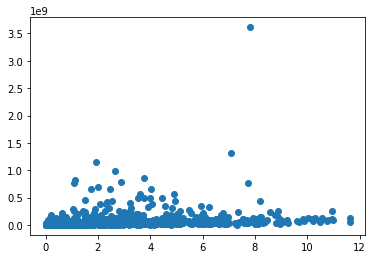

Correlation: 0.16743591886318024
Slope: 11370004.653302548
Intercept: 35141374.39745241
Score: 0.028034786925557827


In [9]:
age = sorted_byViews["Years Old"]
views = sorted_byViews["MV Views"]

print('Age of Music Video vs. Music Video Views:')
plt.scatter(age, views)
plt.show()

model = LinearRegression().fit(sorted_byViews[["Years Old"]], sorted_byViews[["MV Views"]])
age_vs_views_slope = model.coef_[0][0]

print("Correlation:", np.corrcoef(age, views)[0][1])
print("Slope:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])
print("Score:", model.score(sorted_byViews[["Years Old"]], sorted_byViews[["MV Views"]]))

We also compared the age of a music video and the number of views the music video has. There is a correlation coefficient of 0.17 for between the age of the MV and the views of the music video. With a correlation coefficient so close to zero, we can assume that the age of the music video didn’t make too much of a difference with whether the video got more views or not. Using linear regression, the data can be modelled with a line with a slope of 11,370,004.65, an intercept of 35,141,374.40 and a score of 0.028. Since the score of the linear regression is so low, we know that the linear regression model is not too useful, most likely due to the outlier with nearly 3,500,000,000 views. However, as we can see from the graph, no matter how old the video is, there is near no change to how many views the video received.

### Comparison between Female, Male, and Coed K-pop Groups

Female Groups:
Correlation Coefficient between MV Views and Likes: 0.9202292639988282
Slope: 0.009536762044513411
Intercept: 177261.15103183757
Score: 0.8468218983198252
Mean number of MV views: 85767907.44202898
Standard deviation of MV Views: 133385682.00802307
Mean number of Likes: 995209.2753623188
Standard deviation of Likes:1382337.5969678676

Male groups:
Correlation Coefficient between MV Views and Likes: 0.8529617896293399
Slope: 0.013108893485631004
Intercept: 409048.68383956293
Score: 0.7275438145676861
Mean number of MV views: 60958127.31481481
Standard deviation of MV Views: 107085789.3417437
Mean number of Likes: 1208142.2818930042
Standard deviation of Likes: 1645766.8132070233

Coed groups:
Correlation Coefficient between MV Views and Likes: 0.8016360871271917
Slope:0.0028390120762925098
Intercept: 473630.7708508823
Score: 0.6426204161845945
Mean number of MV views: 64761759.86486486
Standard deviation of MV Views: 124320794.22458468
Mean number of Likes: 657490.1891891

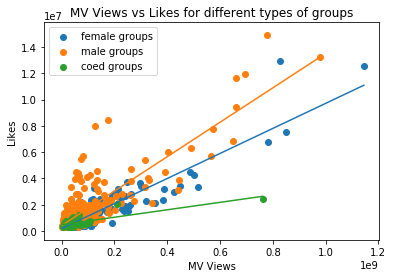

In [10]:
female_groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'] == "female group"]
male_groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'] == "male group"]
coed_groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'] == "coed group"]

plt.scatter(female_groups['MV Views'], female_groups['Likes'], label="female groups")
plt.scatter(male_groups['MV Views'], male_groups['Likes'], label="male groups")
plt.scatter(coed_groups['MV Views'], coed_groups['Likes'], label="coed groups")

model = LinearRegression()
model.fit(female_groups[['MV Views']], female_groups[['Likes']])
y_pred = model.predict(female_groups[['MV Views']])
plt.plot(female_groups['MV Views'], y_pred)
female_mv_likes = model.coef_[0][0]

print("Female Groups:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(female_groups['MV Views'], female_groups['Likes'])[0][1])
print("Slope: " + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(female_groups[['MV Views']], female_groups[['Likes']])))

print("Mean number of MV views: " + str(female_groups['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(female_groups['MV Views'].std()))

print("Mean number of Likes: " + str(female_groups['Likes'].mean()))
print("Standard deviation of Likes:" + str(female_groups['Likes'].std()) +  "\n")

model = LinearRegression()
model.fit(male_groups[['MV Views']], male_groups[['Likes']])
y_pred = model.predict(male_groups[['MV Views']])
plt.plot(male_groups['MV Views'], y_pred)
male_mv_likes = model.coef_[0][0]

print("Male groups:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(male_groups['MV Views'], male_groups['Likes'])[0][1])
print("Slope: " + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(male_groups[['MV Views']], male_groups[['Likes']])))

print("Mean number of MV views: " + str(male_groups['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(male_groups['MV Views'].std()))

print("Mean number of Likes: " + str(male_groups['Likes'].mean()))
print("Standard deviation of Likes: " + str(male_groups['Likes'].std()) + '\n')

model = LinearRegression()
model.fit(coed_groups[['MV Views']], coed_groups[['Likes']])
y_pred = model.predict(coed_groups[['MV Views']])
plt.plot(coed_groups['MV Views'], y_pred)
coed_mv_likes = model.coef_[0][0]

print("Coed groups:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(coed_groups['MV Views'], coed_groups['Likes'])[0][1])
print("Slope:" + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(coed_groups[['MV Views']], coed_groups[['Likes']])))

print("Mean number of MV views: " + str(coed_groups['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(coed_groups['MV Views'].std()))

print("Mean number of Likes: " + str(coed_groups['Likes'].mean()))
print("Standard deviation of Likes: " + str(coed_groups['Likes'].std()) + "\n")

plt.legend()
plt.xlabel("MV Views")
plt.ylabel("Likes")
plt.title("MV Views vs Likes for different types of groups")
plt.show()

Then, we decided to compare the views and likes for different types of groups. We compared between female groups, male groups, and coed groups (groups that contain both females and males.)
<br />
1. Within the female groups, we see a correlation coefficient of 0.92 between MV Views and Likes. The mean number of MV views for female groups is 85,767,907 views, with a standard deviation of 133,385,682 views. The mean number of likes for music videos released by female groups is 995,209 likes with a standard deviation of 1,382,338 likes. We modeled the relationship of MV views and likes for female groups using a linear regression, where there is a slope of 0.0095, an intercept of 177261.15, and a score of 0.85
2. Within the male groups, we see a correlation coefficient of 0.85. The mean number of views for MVs released by male groups is 60,958,127 views with a standard deviation of 107,085,789 views. The mean number of likes for MVs released by male groups is 1,208,142 likes, with a standard deviation of 1,645,767 likes. Using linear regression, we can see that the relationship between MV views and likes can be represented with a slope of 0.013, an intercept of 409048.68, and a score of 0.73.
3. Within the coed groups, we see a correlation coefficient of 0.80 between MV views and likes. Music videos released by coed groups have a mean number of MV views of 64,761,760 views with a standard deviation of 124,320,794. Music videos released by coed groups have a mean number of likes of 657,490, with a standard deviation of 440,284. Using linear regression, we can represent the MV views and likes for coed groups with a line where the slope is 0.0028, with an intercept of 473630.77, and a score of 0.64.
<br />

From the correlation coefficients of all three categories, we can see that there is a very high positive correlation between MV views and likes for all the groups, although it seems that female groups have the highest correlation. The mean number of MV views also seems to be highest for girl groups, although it seems that all 3 categories have a similar range of MV views as seen from the standard deviation. Male groups seem to gather the most likes per view, as seen from the slope of the linear regressions.


### Comparison between K-pop Groups and K-pop Solo Artists

Groups:
Correlation Coefficient between MV Views and Likes: 0.8360590874189197
Slope: 0.010818644062395317
Intercept: 354982.3421065123
Score: 0.6989947976557567
Mean number of MV views: 69704352.24530663
Standard deviation of MV Views: 118046465.8129733
Mean number of Likes: 1109088.9186483105
Standard deviation of Likes: 1527526.8407128318

Soloists:
Correlation Coefficient between MV Views and Likes: 0.8785744470514014
Slope:0.004924510900483624
Intercept: 613980.4303706298
Score: 0.7718930590116762
Mean number of MV views: 72609416.38121547
Standard deviation of MV Views: 287344310.4429597
Mean number of Likes: 971546.2928176796
Standard deviation of Likes: 1610597.9336381939


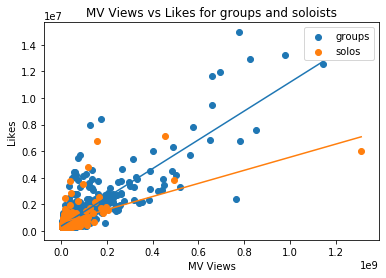

In [11]:
groups=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'].str.contains("group")]
solos=sorted_byViews_ascending[sorted_byViews_ascending['Type of Artist'].str.contains("soloist")]

plt.scatter(groups['MV Views'], groups['Likes'], label="groups")
plt.scatter(solos['MV Views'][:-1], solos['Likes'][:-1], label="solos")

model = LinearRegression()
model.fit(groups[['MV Views']], groups[['Likes']])
y_pred = model.predict(groups[['MV Views']])
plt.plot(groups['MV Views'], y_pred)
groups_mv_likes = model.coef_[0][0]

print("Groups:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(groups['MV Views'], groups['Likes'])[0][1])
print("Slope: " + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(groups[['MV Views']], groups[['Likes']])))
print("Mean number of MV views: " + str(groups['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(groups['MV Views'].std()))
print("Mean number of Likes: " + str(groups['Likes'].mean()))
print("Standard deviation of Likes: " + str(groups['Likes'].std()) + "\n")

model = LinearRegression()
model.fit(solos[['MV Views']], solos[['Likes']])
y_pred = model.predict(solos[['MV Views']])
plt.plot(solos['MV Views'][:-1], y_pred[:-1])
solos_mv_likes = model.coef_[0][0]

print("Soloists:")
print('Correlation Coefficient between MV Views and Likes:', np.corrcoef(solos['MV Views'], solos['Likes'])[0][1])
print("Slope:" + str(model.coef_[0][0]))
print("Intercept: " + str(model.intercept_[0]))
print("Score: " + str(model.score(solos[['MV Views']], solos[['Likes']])))
print("Mean number of MV views: " + str(solos['MV Views'].mean()))
print("Standard deviation of MV Views: " + str(solos['MV Views'].std()))
print("Mean number of Likes: " + str(solos['Likes'].mean()))
print("Standard deviation of Likes: " + str(solos['Likes'].std()))

plt.legend()
plt.xlabel("MV Views")
plt.ylabel("Likes")
plt.title("MV Views vs Likes for groups and soloists")
plt.show()

We also decided to compare MV views and likes of groups versus soloists.
<br />
1. For K-pop groups, we can see a correlation coefficient of 0.84 between MV views and likes. This means that as MV views increase, the number of likes the video gets also tends to increase. The mean number of MV views for K-pop groups is 69,704,352 views with a standard deviation 118,046,465 views. The mean number of likes for music videos released by K-pop groups is 1,109,089, with a standard deviation of 1,527,527. Using linear regression, we can model the data using a line with a slope of 0.011, an intercept of 354,982, and a score of 0.70. This slope means that for every one view, there are 0.011 likes, which can be rewritten as for every 1 like, there are approximately 91 views.
2. For soloists, we decided to disregard an outlier data point with 3,612,465,662 views and 17,848,966 likes, since it nearly triples the second largest data point for soloists, and it also triples the largest data point for groups. There is a correlation coefficient of 0.88 between MV views and likes. Thus, similarly to K-pop groups, the number of likes on an MV tends to increase as the number of views on an MV increases. There is a mean of 72,609,416 views for MVs released by soloists, with a standard deviation of 287,344,310. MVs released by soloists have a mean number of 971,546 likes with a standard deviation of 1,610,597. The data can be modelled using linear regression with a line of slope 0.0049, an intercept of 613980.43, and a score of 0.77. This slope means that for every one view there is approximately 0.0049 likes which can be rewritten as for every 1 like, there is approximately 204 views
<br />
 
From the above observations, we can see that both K-pop groups and soloists tend to have an equally positive relationship between MV views and likes. Both soloists and groups also tend to get a similar number of views and likes, since their mean number of MV views and likes are somewhat similar. However, it seems that soloists tend to have a wider span of MV views, as the standard deviation of MV likes is greater for soloists than groups. 


## Evaluation of Significance
We chose to use random permutations in addition to t-tests in order to compare the patterns we found in our dataset and determine whether our attested scores actually have significance or whether they’re attributed to randomness. Thus, we looked at the permutations and t-tests for each linear regression we created to compare the different values in our dataset.
<br /> 

For the permutations, we created 1,000 linear regressions for each trend we were looking at with the existing MV Views as our independent variable and a permuted list of the Likes as our dependent variable in order to introduce randomness into the equation. We then calculated the amount of regressions with permuted y-values that produced steeper slopes than the original linear regression and plotted a histogram of all of the permuted slopes. For each of our trends, we found that none of the trials had steeper slopes than the original. This shows that we have extremely reliable measurements of the trends we found between the variables we compared.
<br /> 

In order to help confirm our findings from the random permutations, we then proceeded to conduct t-tests for all of the trends. In order to do so, we first calculated for standard error using the formula for standard error of a regression slope: SE = sqrt(sum(y-ymean)^2/(n-2))/sqrt(sum(x-xmean)^2). Based on the results, none of the standard errors we calculated exceeded 0.00037. Since the bigger the standard error, the less accurate our statistic becomes, we can already start to see confirmation that our findings have extremely little random error to be found. Then we plotted the t-test probability density function against the permuted slopes to see how the values aligned. Again, the t-distribution values remained incredibly small, with none exceeding 1e-7. This confirms our findings that we are extremely confident about the correlation of all of our trends, namely that there is a strong positive linear correlation between MVs and Likes for all K-pop artists in general, with the trend for K-pop girl groups being particularly strong compared to the other categories and coed groups being the weakest, though still a strong association as a whole. Lastly, how old a music video is has an extremely weak positive correlation to the amount of view a music video tends to get.
<br /> 

One thing we’d like to recognize is that based on the histograms we plotted with the permuted slopes, most tended to moderately skew right except for the MVs vs Likes for K-pop Solo which displayed a more extreme skew. This may seem concerning as the t-test bases the x variable on a normal distribution; however, we compensate for the lack of normality by increasing our simulation size to 1,000 so that the distributions eventually do converge to an approximately normal distribution based on the central limit theorem. The smallest sample size we had to work around was for the trend on Coed K-pop groups with 35 degrees of freedom. However, the rest averaged around a sample size of 615 points of entry.


In [12]:
def permuted_y(array):
    return np.random.permutation(array.copy())

# params
# xarray = x dataframe col from model
# yarray = y dataframe col from model
# slopes = slope array to fill
# original_slope = original slope
def get_steeper_slopes(xarray, yarray, slopes, original_slope):
    steeper_slopes = 0
    for i in range(len(slopes)):
        fake_y = permuted_y(yarray)
        lr = LinearRegression().fit(xarray, fake_y)
        fake_slope = lr.coef_[0]
        slopes[i] = fake_slope
        if np.abs(fake_slope) > np.abs(original_slope):
            steeper_slopes += 1
    print("Number of steeper slopes: {}".format(steeper_slopes))
    plt.hist(reg_slopes, bins = 30)
    plt.show()
    return steeper_slopes
            
def get_standard_error(x, y, predict):
    mean_x = np.mean(x)
    sum_x_squared = np.sum((x - mean_x) ** 2)
    sum_squared_error = np.sum((y - predict) ** 2)
    return np.sqrt(sum_squared_error / (len(x) - 2)) / np.sqrt(sum_x_squared)

# params
# slopes = filled slope array of length 1000
# std_error = array from get_standard_error
# original_slope = original slope
# df = number of x values - 2
# steeper_slopes = count of steeper slopes
def plot_t_disb(slopes, std_error, original_slope, df_val, steeper_slopes):
    bins = np.linspace( -5, 5, 30) #left edges of bins
    n, bins, patches = plt.hist(slopes / std_error, bins = bins)
    for b, p in zip(bins, patches):
        if b >= original_slope:
            p.set_color("red") #steeper slopes

        else:
            p.set_color("darkblue")

    plt.plot(bins, t.pdf(bins, df = df_val) * 1000 * (bins[1] - bins[0]))
    plt.show()
    
    print("Percent of steeper slopes:", steeper_slopes / 2 / 1000)
    print("t distribution:", 1 - t.cdf(original_slope / std_error, df = df_val))

### MVs vs Likes for All K-pop

Number of steeper slopes: 0


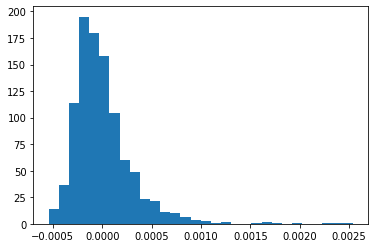

In [13]:
reg_slopes = np.zeros(1000)
steeper_slopes = get_steeper_slopes(sorted_byViews[['MV Views']], sorted_byViews['Likes'], reg_slopes, mv_vs_likes_slope)
t_model = LinearRegression().fit(sorted_byViews[["MV Views"]], sorted_byViews["Likes"])
std_error = get_standard_error(sorted_byViews["MV Views"],
                               sorted_byViews["Likes"],
                               t_model.predict(sorted_byViews[["MV Views"]]))

Visual of % of Steeper slopes between MV Views and Likes


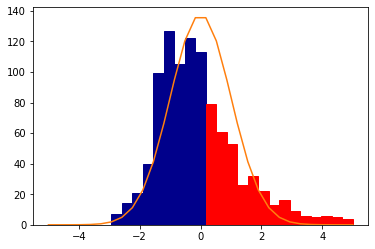

Percent of steeper slopes: 0.0
t distribution: 0.0
Standard error: 0.00018732348840678955
Degrees of Freedom: 978


In [14]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(sorted_byViews[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, mv_vs_likes_slope, df_val, steeper_slopes)
print("Standard error:", std_error)
print("Degrees of Freedom:", df_val)

### How old MV is vs MV Views

Age of Music Video vs. Music Video Views: Randomization
Number of steeper slopes: 0


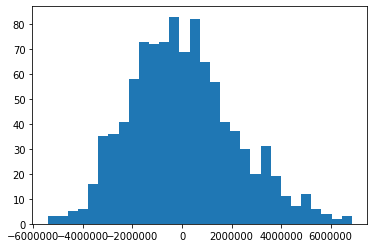

In [15]:
reg_slopes = np.zeros(1000)
print("Age of Music Video vs. Music Video Views: Randomization")
steeper_slopes = get_steeper_slopes(sorted_byViews[["Years Old"]], sorted_byViews["MV Views"], reg_slopes, age_vs_views_slope)
t_model = LinearRegression().fit(sorted_byViews[["Years Old"]], sorted_byViews["MV Views"])
std_error = get_standard_error(sorted_byViews["Years Old"],
                               sorted_byViews["MV Views"],
                               t_model.predict(sorted_byViews[["Years Old"]]))

Visual of % of Steeper slopes between MV Views and Likes


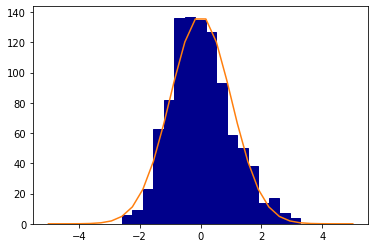

Percent of steeper slopes: 0.0
t distribution: 6.741940794530166e-08
Standard error: 2140759.825766173
Degrees of Freedom: 978


In [16]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(sorted_byViews[["Years Old"]]) - 2
plot_t_disb(reg_slopes, std_error, age_vs_views_slope, df_val, steeper_slopes)
print("Standard error:", std_error)
print("Degrees of Freedom:", df_val)

### MVs vs Likes for K-pop Groups

MVs vs Likes for K-pop Groups Randomization
Number of steeper slopes: 0


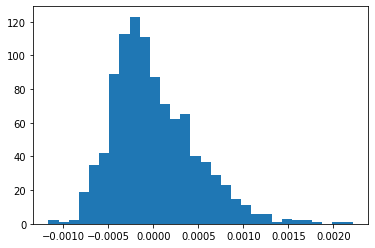

In [17]:
reg_slopes = np.zeros(1000)
print("MVs vs Likes for K-pop Groups Randomization")
steeper_slopes = get_steeper_slopes(groups[['MV Views']], groups['Likes'], reg_slopes, groups_mv_likes)
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
t_model = LinearRegression().fit(groups[['MV Views']], groups['Likes'])
std_error = get_standard_error(groups["MV Views"],
                               groups["Likes"],
                               t_model.predict(groups[["MV Views"]]))

Visual of % of Steeper slopes between MV Views and Likes


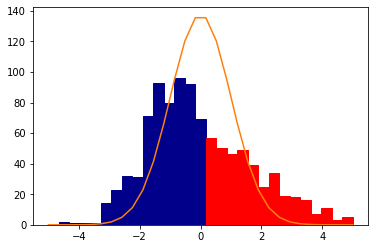

Percent of steeper slopes: 0.0
t distribution: 0.0
Standard error: 0.00025147435387718327
Degrees of Freedom: 797


In [18]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(groups[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, groups_mv_likes, df_val, steeper_slopes)
print("Standard error:", std_error)
print("Degrees of Freedom:", df_val)

### MVs vs Likes for K-pop Solos

MVs vs Likes for K-pop Solos
Number of steeper slopes: 0


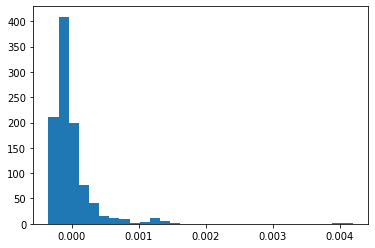

In [19]:
reg_slopes = np.zeros(1000)
print("MVs vs Likes for K-pop Solos")
steeper_slopes = get_steeper_slopes(solos[['MV Views']], solos['Likes'], reg_slopes, solos_mv_likes)
t_model = LinearRegression().fit(solos[["MV Views"]], solos["Likes"])
std_error = get_standard_error(solos["MV Views"],
                               solos["Likes"],
                               t_model.predict(solos[["MV Views"]]))

Visual of % of Steeper slopes between MV Views and Likes


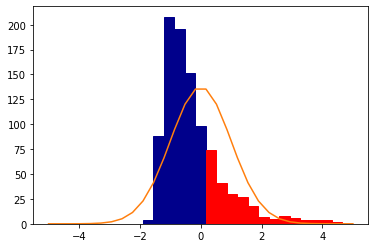

Percent of steeper slopes: 0.0
t distribution: 0.0
Standard error: 0.0002000908688264877
Degrees of Freedom: 179


In [20]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(solos[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, solos_mv_likes, df_val, steeper_slopes)
print("Standard error:", std_error)
print("Degrees of Freedom:", df_val)

### MVs vs Likes for Female K-pop

MVs vs Likes for Female K-pop
Number of steeper slopes: 0


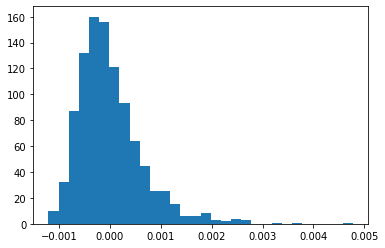

In [21]:
reg_slopes = np.zeros(1000)
print("MVs vs Likes for Female K-pop")
steeper_slopes = get_steeper_slopes(female_groups[['MV Views']], female_groups['Likes'], reg_slopes, female_mv_likes)
t_model = LinearRegression().fit(female_groups[["MV Views"]], female_groups["Likes"])
std_error = get_standard_error(female_groups["MV Views"],
                               female_groups["Likes"],
                               t_model.predict(female_groups[["MV Views"]]))

Visual of % of Steeper slopes between MV Views and Likes


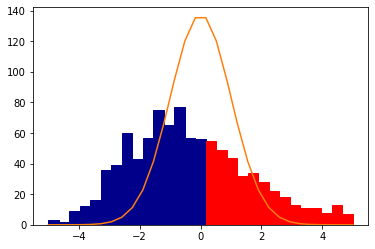

Percent of steeper slopes: 0.0
t distribution: 0.0
Standard error: 0.00024503491231347757
Degrees of Freedom: 274


In [22]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(female_groups[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, female_mv_likes, df_val, steeper_slopes)
print("Standard error:", std_error)
print("Degrees of Freedom:", df_val)

### MVs vs Likes for Male K-pop

Total MV Views vs Likes Randomization
Number of steeper slopes: 0


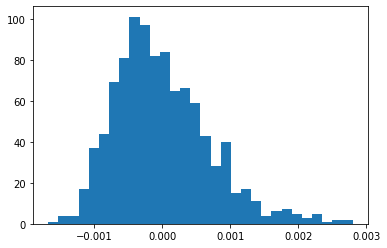

In [23]:
reg_slopes = np.zeros(1000)
print("Total MV Views vs Likes Randomization")
steeper_slopes = get_steeper_slopes(male_groups[['MV Views']], male_groups['Likes'], reg_slopes, male_mv_likes)
t_model = LinearRegression().fit(male_groups[["MV Views"]], male_groups["Likes"])
std_error = get_standard_error(male_groups["MV Views"],
                               male_groups["Likes"],
                               t_model.predict(male_groups[["MV Views"]]))

Visual of % of Steeper slopes between MV Views and Likes


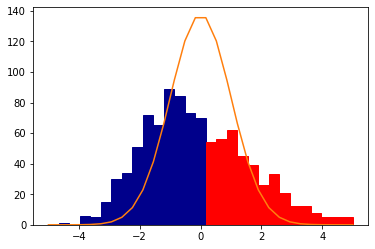

Percent of steeper slopes: 0.0
t distribution: 0.0
Standard error: 0.00036463815754733697
Degrees of Freedom: 484


In [24]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(male_groups[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, male_mv_likes, df_val, steeper_slopes)
print("Standard error:", std_error)
print("Degrees of Freedom:", df_val)

### MVs vs Likes for Coed K-pop

Total MV Views vs Likes Randomization
Number of steeper slopes: 0


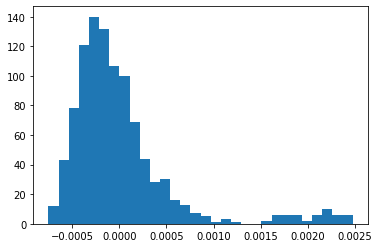

In [25]:
reg_slopes = np.zeros(1000)
print("Total MV Views vs Likes Randomization")
steeper_slopes = get_steeper_slopes(coed_groups[['MV Views']], coed_groups['Likes'], reg_slopes, coed_mv_likes)
t_model = LinearRegression().fit(coed_groups[["MV Views"]], coed_groups["Likes"])
std_error = get_standard_error(coed_groups["MV Views"],
                               coed_groups["Likes"],
                               t_model.predict(coed_groups[["MV Views"]]))

Visual of % of Steeper slopes between MV Views and Likes


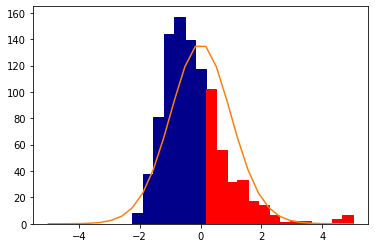

Percent of steeper slopes: 0.0
t distribution: 1.2452486819469755e-09
Standard error: 0.00035786632012271944
Degrees of Freedom: 35


In [26]:
print("Visual of % of Steeper slopes between MV Views and Likes")
df_val = len(coed_groups[["MV Views"]]) - 2
plot_t_disb(reg_slopes, std_error, coed_mv_likes, df_val, steeper_slopes)
print("Standard error:", std_error)
print("Degrees of Freedom:", df_val)

## Conclusion
Overall, as we can see from the data analysis, we can confidently say that as MV views increase, the likes for that specific MV also tends to increase. This makes sense as it shows us that videos that are seen by more people are more likely to receive a like, in comparison to a video that doesn’t have as many views. 
<br />

We also see that there is practically no correlation between the release date of an MV and the amount of views they gather. This is a bit unexpected, since you’d expect that a video that has been online for a longer time would have more views than a video that is relatively new. 
<br />

We can see from the third graph -- which compares female, male, and coed groups -- female groups also have the largest standard deviation, which signifies a large range in views, which can mean that MVs released by female groups tend to either do really well or really poorly in terms of views. In comparison, male groups have the lowest standard deviation. This can signify that male groups tend to be very stable overall, being able to gather a similar number of views for their MVs. In comparison, coed groups have a relatively smaller number of views, but they also have a relatively high standard deviation, which can signify that coed groups can either do really well, or really badly. From the linear regressions, since male groups have the highest slope, this can mean that people who watch a male group video are more likely to like the video, in comparison to the other types of groups. From this, we can assume that currently, boy groups are the most popular, although it seems that girl groups gather the most attention.
<br />

From the fourth graph, we can see that groups tend to do better than soloists in both views and likes, especially looking at the linear regression slopes of the two. However, we can see from the graph that soloists have a few videos that do really well.
<br />

Going forward, it might be useful to also look at like ratios, as there seems to be a different relationship between like ratios and views, since a high view count does not necessarily mean a high likes ratio. In regards to further data analysis and investigation of this, the dataframe could be sorted by the likes ratio and a dictionary that contained information of the likes ratio, each artist and their released MVs could be created. This may reveal more insights about the Korean pop industry than we have already observed. 
<br />

In addition, we can look at sales, overall views, and overall likes for specific groups to get a better understanding of the success of different groups, since individual MV views and likes are not the only way to look at success. It would also be interesting to look at specific groups, like the top 10 boy groups, girl groups, and coed groups, and comparing those groups. This might also create a stronger trend/difference between the different categories because, if we look at the graphs, there seems to be a bigger difference within the top view data points, in comparison to the lower few points, which seem to all cluster together despite their category.


## Source Code

GitHub Repository: https://github.coecis.cornell.edu/sac342/info2950_project

## Acknowledgements

Standard error of regression slope formula found on: https://www.statisticshowto.com/find-standard-error-regression-slope/
<br /> 

T-test function adapted from the May 1st tutorial on random permutations
<br /> 

Homework solutions for HW 5, 6, and 7 as well as our own solutions from class
<br /> 

Beautiful Soup Documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/ 